In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from constants import numeric_columns as num_cols


#in titanic
#   import math

In [121]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import DBSCAN

#in titanic fa con scipy
    #from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

#vedere se serve
#evaluation
from sklearn.metrics import silhouette_score

#vedere se serve
#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform


In [122]:
df = pd.read_csv("pp_train.csv")
df.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,...,is_Fantasy,is_Family,is_Mystery,is_Talk-Show,is_Drama,is_Sport,is_War,is_Horror,is_Animation,fill_runtimeMinutes
0,Neogenic Nightmare Chapter 3: Hydro-Man,8,1995,NaN,NaN,0.0,779,1,0,21,...,0,0,0,0,0,0,0,0,1,40.0
1,Looping,6,1982,NaN,NaN,0.0,11,1,0,1,...,0,0,0,0,0,0,0,0,0,28.0
2,Idealnaya para,6,1992,NaN,NaN,0.0,38,1,0,24,...,0,0,0,0,0,0,0,0,0,90.0
3,MasterChef Celebrity México,6,2021,NaN,NaN,0.0,15,22,0,56,...,0,0,0,0,0,0,0,0,0,31.0
4,Seutateueob,8,2020,2020.0,80.0,1.0,15718,347,2,47,...,0,0,0,0,1,0,0,0,0,80.0


In [123]:
df["awardWins"].value_counts()

awardWins
0.0      14589
1.0        860
2.0        354
3.0        173
4.0        116
5.0         74
7.0         43
6.0         36
8.0         30
10.0        20
9.0         20
11.0        16
12.0        14
13.0         7
16.0         6
14.0         6
20.0         5
26.0         5
19.0         5
24.0         5
17.0         5
23.0         5
15.0         5
28.0         4
18.0         3
30.0         2
49.0         2
21.0         2
35.0         1
37.0         1
43.0         1
36.0         1
83.0         1
76.0         1
22.0         1
50.0         1
25.0         1
31.0         1
62.0         1
75.0         1
29.0         1
109.0        1
39.0         1
57.0         1
34.0         1
145.0        1
47.0         1
Name: count, dtype: int64

In [124]:
#columns 
#   'startYear', 'runtimeMinutes', 'awardWins', 'numVotes', 'totalImages',
#   'totalVideos', 'totalCredits', 'criticReviewsTotal', 'awardNominationsExcludeWins',
#   'numRegions', 'userReviewsTotal','ratingCount'
# ????
#   'rating', 'canHaveEpisodes', 'isAdult', 'genres' (as 1henc or as a count?)

In [125]:
features = df[['startYear', 'fill_runtimeMinutes', 'awardWins', 'numVotes', 'totalImages','totalVideos', 'totalCredits', 'criticReviewsTotal', 
               'awardNominationsExcludeWins','numRegions', 'userReviewsTotal']]

df_num = features.values

In [126]:
#presuppongo di voler fare poi i controlli cluster in abse a titletype
y = np.array(df['titleType']) 
#a way to define x and y; they are the numpy arrays of the dataset

y_map = {
    0: 'tvEpisode',
    1: 'videoGame',
    2: 'movie',
    3: 'tvSeries',
    4: 'video',
    5: 'tvMiniSeries',
    6: 'short',
    7: 'tvMovie',
    8: 'tvSpecial',
    9: 'tvShort'
}
y_mapped = pd.DataFrame(y).iloc[:,0].map(y_map)
#y is our target label; mapped into strings (y_map)

### Normalizations 

In [127]:
## logaritmica

In [128]:
X = df_num.copy()
X = np.log1p(X)

In [129]:
## Sklearn -> inizializza metodo, fit su dati che abbiamo, transform/predict in base al metodo

In [130]:
# z-score, fit and then transform
scaler = StandardScaler()   #inizialize the standard scaler
scaler.fit(X) #fit the scaler on the data; x è la numpy matrix of the dataset
X_z_scal = scaler.transform(X) #transform to have the scaled version


# min-max, fit and trasform directly
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X) #fit e scaler in una riga sola

In [131]:
X_scal = X_z_scal

## DBSCAN

In [222]:
dbscan = DBSCAN(eps=1.98, min_samples=11, metric="euclidean")
dbscan.fit(X_scal)

#initiialize and fit into data 

DBSCAN(eps=1.98, min_samples=11)

In [133]:
#standscale
"""
sns.scatterplot(data=df,x="criticReviewsTotal", y="numVotes", 
                hue=dbscan.labels_, style=dbscan.labels_, palette="bright")
plt.show()
""" 

'\nsns.scatterplot(data=df,x="criticReviewsTotal", y="numVotes", \n                hue=dbscan.labels_, style=dbscan.labels_, palette="bright")\nplt.show()\n'

In [223]:
np.unique(dbscan.labels_, return_counts=True)
#to have the classification of the different clusters (messi dopo -> -1 è il noise) e quanti points in ogni cluster

(array([-1,  0,  1], dtype=int64), array([  799, 14537,  1095], dtype=int64))

In [224]:
# counting silhouette also w.r.t to noise cluster (-1)
print('Silhouette', silhouette_score(X_scal, dbscan.labels_)) 

#considering DBSCAN but not noise cluster
print('Silhouette', silhouette_score(X_scal[dbscan.labels_ != -1], dbscan.labels_[dbscan.labels_ != -1])) 

#when we measure silh. on DBSCAN labels we would count the silh. also with respect to noise cluster (-1)
#se non si considerano il noise cl. la silhouette è higher perchè noise points are far and so this influences silh. due to the long distances  
#so everytime that we measure the silhouette for DBSCAN scartiamo anche noise così misuriamo risultato solo sui cluster

Silhouette 0.3146315835392099
Silhouette 0.3350957970152227


In [136]:
dbscan.labels_

#possiamo accedere alle label-> possiamo fare quello che vogliamo

array([ 0,  0,  0, ..., -1,  1,  0], dtype=int64)

### kth neighbor distance

In [137]:
#misuro distanze dal kth nearest n. -> usando pairwise distance da ogni pt (ptovo con eucl)
dist = pdist(X_scal, 'euclidean') 
dist = squareform(dist)

#risultato -> array compresso con distanze per ogni coppia di punti nel dataset.

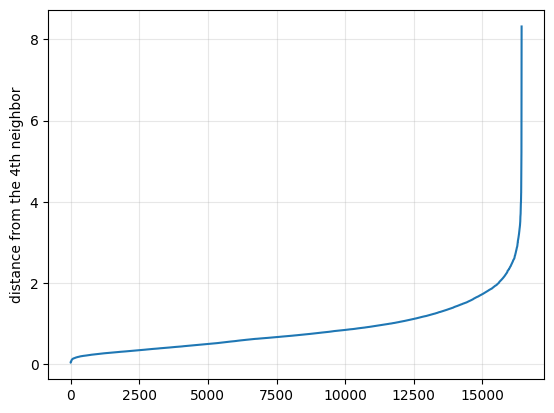

In [138]:
k=4
kth_distances = []

for d in dist:  # d is a vector containing distances between the ith record and all the others
    index_kth_distance = np.argsort(d)[k]  # take the index of the kth nearest neighbor
    kth_distances.append(d[index_kth_distance])  # store the distance in a list


plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('distance from the {}th neighbor'.format(k))
plt.grid(True, alpha=0.3)
plt.show()

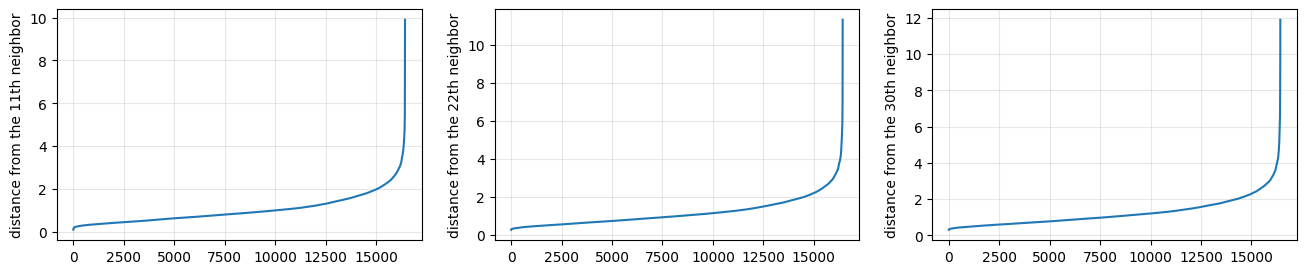

In [160]:
#"""
#dobbiamo farlo non solo con il quarto -> helpful if the data is larger
#infatti nell'ultimo, usando il 62 -> if we consider clustering by using 62 points for a point to be considered as a core point vediamo i due cluster
ks = [11, 22, 30]


fig = plt.figure(figsize=(16, 3)) # dimensions of the overall plot
fig_dims = (1, len(ks))

for i in range(len(ks)):
    k = ks[i]
    kth_distances = []

    for d in dist:  # d is a vector containing distances between the ith record and all the others
        index_kth_distance = np.argsort(d)[k]  # take the index of the kth nearest neighbor
        kth_distances.append(d[index_kth_distance])  # store the distance in a list

    plt.subplot2grid(fig_dims, (0, i))
    plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
    plt.ylabel('distance from the {}th neighbor'.format(k))
    plt.grid(True, alpha=0.3)
             
#plt.tight_layout()
#fig, axes = plt.subplots(2, 3, figsize=(15, 10))
plt.show()
#"""